## Import the packeges 


In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import cv2 
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from skimage import data

from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

In [6]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train data set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test data set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch =12,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 4)

Found 420 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - 20s 2s/step - loss: 0.6549 - acc: 0.5928 - val_loss: 0.7140 - val_acc: 0.4531
Epoch 2/10
12/12 [==============================] - 13s 1s/step - loss: 0.5781 - acc: 0.7292 - val_loss: 0.7430 - val_acc: 0.6797
Epoch 3/10
12/12 [==============================] - 12s 1s/step - loss: 0.5414 - acc: 0.7253 - val_loss: 0.4761 - val_acc: 0.8359
Epoch 4/10
12/12 [==============================] - 14s 1s/step - loss: 0.4197 - acc: 0.8338 - val_loss: 0.5196 - val_acc: 0.7188
Epoch 5/10
12/12 [==============================] - 14s 1s/step - loss: 0.3435 - acc: 0.8402 - val_loss: 0.4492 - val_acc: 0.8516
Epoch 6/10
12/12 [==============================] - 16s 1s/step - loss: 0.3050 - acc: 0.8776 - val_loss: 0.4100 - val_acc: 0.8281
Epoch 7/10
12/12 [==============================] - 15s 1s/step - loss: 0.2779 - acc: 0.8742 - val_loss: 0.4227 - val_acc: 0.8359
Epoch 8/

In [9]:
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model

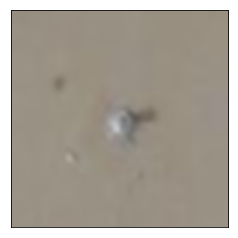

In [14]:
plt.imshow(image.load_img('VP Completed.JPG', target_size = (64, 64)), cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

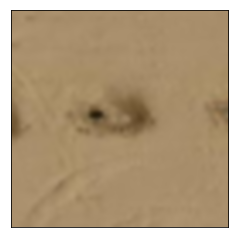

In [16]:
plt.imshow(image.load_img('VP till AUGUR.JPG', target_size = (64, 64)), cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [141]:
new_input = test_datagen.flow_from_directory('new input',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 10 images belonging to 1 classes.


In [181]:
pred = classifier.predict_generator(new_input,verbose=0)

In [182]:
predicted_class_indices=np.round(pred)

In [183]:
predicted_class_indices = np.reshape(predicted_class_indices, 10)

In [184]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [185]:
labels

{0: 'VP Completed', 1: 'VP Till AUGUR'}

In [186]:
filenames=new_input.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [13]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('big.JPG', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict_on_batch(test_image)

In [14]:
result 

array([[0.]], dtype=float32)

In [178]:
if result == 0:
    print("It is VP Completed")
else:
    print("It is VP till AUGUR")

It is VP Completed
